<a href="https://colab.research.google.com/github/rafaborth/TCC/blob/main/OCE410110_Lista03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LISTA DE EXERCÍCIOS 03**

Aluna: Rafaela Chiminelli Borth
Matrícula: 202405052
Disciplina: OCE410110 - Métodos Matriciais Aplicados a Oceanografia
Professor: Antônio Fernando Harter Fetter Filho



In [ ]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive') #habilita drive para importar os arquivos

Mounted at /content/gdrive


In [ ]:
import scipy.io

In [ ]:
conc = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Metodos_matriciais/lista03_conc_co2.csv')

In [ ]:
conc['data'] = pd.to_datetime(conc[['year', 'month']].assign(day=1))
conc.set_index('data', inplace=True)

Nestes exercícios será utilizada uma série de tempo de concentração mensal de CO2 na atmosfera (o cabeçalho do arquivo explica a estrutura dos dados), medida no Laboratório de Mauna Loa (Havaí).  

1) Utilizando a coluna 'average' do arquivo de dados de  CO2, faça:

a) Faça um gráfico da concentração de CO2 em Mauna Loa.


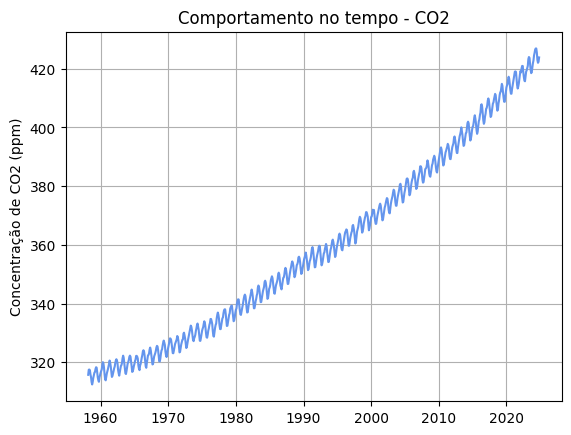

In [ ]:
def plotSeries(df):
    # Plot de toda a série temporal
    plt.xlabel('')
    plt.title('Comportamento no tempo - CO2')
    plt.grid()
    plt.ylabel('Concentração de CO2 (ppm)')
    plt.plot(df['average'], color='cornflowerblue')

    return

plotSeries(conc)

5


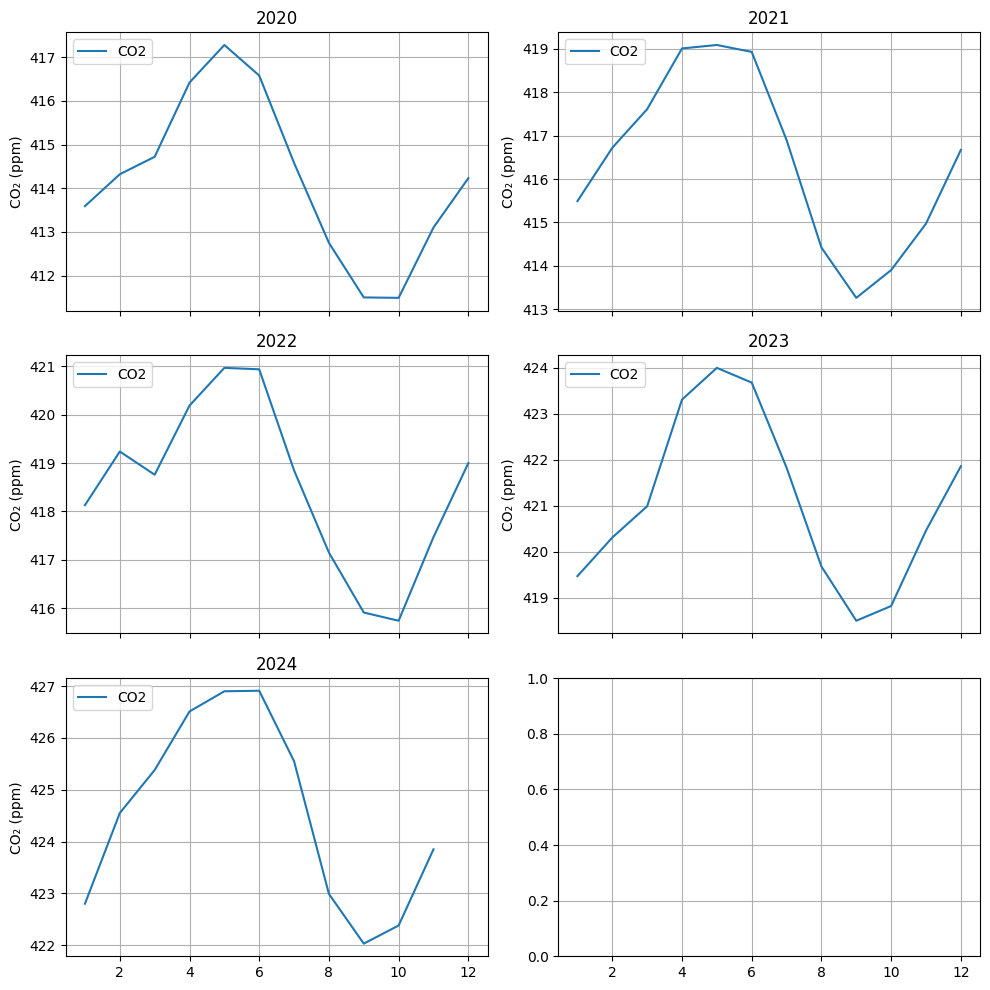

In [ ]:
def plotYears(df):
    # Plot da série temporal para cada ano - para observar os tipos de variação
    y = 5
    years = sorted(df['year'].unique())[-y:] #separa a análise para os 10 últimos anos da série
    n_years = len(years)
    print(n_years)

    fig, axs = plt.subplots(3, 2, figsize=(10, n_years * 2), sharex=True)
    axs = axs.flatten()

    # Plot each year's data
    for i, year in enumerate(years):
        yearly_data = df[df['year'] == year]
        axs[i].plot(yearly_data['month'], yearly_data['average'], label='CO2') #label=f"CO₂ em {year}"
        axs[i].set_title(f"{year}")
        axs[i].grid()
        axs[i].set_ylabel("CO₂ (ppm)")
        axs[i].legend(loc="upper left")

    plt.xlabel("")
    plt.grid()
    plt.tight_layout()
    plt.show()

    return

plotYears(conc)

b) O que são as oscilações de alta frequência observadas nos dados? Qual processo poderia ser responsável por estas oscilações?

As oscilações de alta frequência nos dados podem estar relacionadas a variações rápidas no balanço de CO₂ entre a atmosfera, os oceanos e a biosfera.

No caso dos oceanos, a temperatura desempenha um papel crucial. Quando a água do oceano está mais quente, sua capacidade de reter CO₂ diminui, liberando mais gás para a atmosfera. Em contraste, em temperaturas mais baixas, o oceano atua como um reservatório mais eficiente, absorvendo maiores quantidades de CO₂. Essas trocas rápidas e dinâmicas podem gerar as oscilações observadas nos dados.









c) Aproximadamente, qual a amplitude destas oscilações? Qual a variação da concentração de CO2 na atmosfera nos últimos 50 anos e, qual o aumento médio por ano?

In [ ]:
year_ampl = conc.groupby('year')['average'].agg(lambda x: x.max() - x.min())
year_stats = conc.groupby('year')['average'].agg(['mean', 'min', 'max'])
year_stats['annual_increase'] = year_stats['mean'].diff()

In [ ]:
print('Variação de CO2 na atmosfera nos últimos 50 anos (ppm): '+str(year_ampl.mean()))

Variação de CO2 na atmosfera nos últimos 50 anos 5.752835820895518


In [ ]:
print('Aumento médio por ano (ppm): '+str(year_ampl))

Aumento médio por ano (ppm): year
1958    5.09
1959    4.96
1960    6.20
1961    5.59
1962    5.60
        ... 
2020    5.79
2021    5.83
2022    5.23
2023    5.50
2024    4.88
Name: average, Length: 67, dtype: float64


In [ ]:
def plotMeans(df):
    for col in df.columns:  # Exclude 'year' column
        plt.plot(df[col], label=col)
    plt.legend()

    return

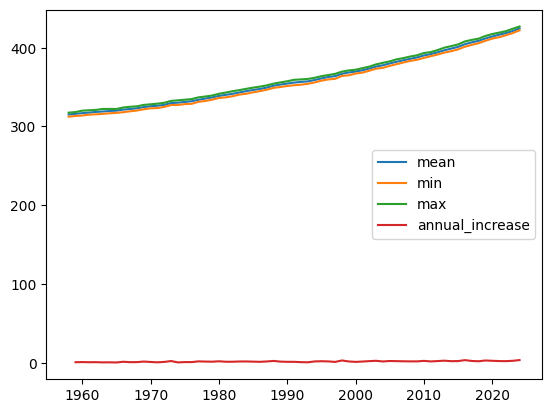

In [ ]:
plotMeans(year_stats)

d) Remova a tendência da série de dados. Para tanto, ajuste um modelo linear as dados de CO2, do tipo:
CO2_mod = xo + x1 . t

Onde, t é o tempo. Então, calcule a nova série sem a tendência linear:
CO2_st = CO2 - CO2_mod


In [ ]:
import statsmodels.api as sm

In [ ]:
def regModel(df):
  df['t'] = np.arange(len(df)) # Crie uma variável de tempo (t) a partir do índice datetime

  # Ajuste o modelo linear: CO2_mod = x0 + x1 * t
  X = sm.add_constant(df['t'])  # Adiciona a constante ao modelo (x0)
  model = sm.OLS(df['average'], X).fit()

  # Calcula os valores ajustados (CO2_mod)
  df['CO2_mod'] = model.predict(X)

  # Remove a tendência: CO2_st = CO2 - CO2_mod
  df['CO2_st'] = df['average'] - df['CO2_mod']

  print(df[['average', 'CO2_mod', 'CO2_st']])

  return df

In [ ]:
conc_linear = regModel(conc.copy())

            average     CO2_mod     CO2_st
data                                      
1958-03-01   315.71  304.840711  10.869289
1958-04-01   317.45  304.977626  12.472374
1958-05-01   317.51  305.114541  12.395459
1958-06-01   317.27  305.251456  12.018544
1958-07-01   315.87  305.388371  10.481629
...             ...         ...        ...
2024-07-01   425.55  413.825013  11.724987
2024-08-01   422.99  413.961928   9.028072
2024-09-01   422.03  414.098843   7.931157
2024-10-01   422.38  414.235758   8.144242
2024-11-01   423.85  414.372673   9.477327

[801 rows x 3 columns]


e) Faça um gráfico com as curvas de CO2 e CO2_mod superpostas em cores diferentes, adicione uma legenda.

Text(0, 0.5, 'Concentração de CO2 (ppm)')

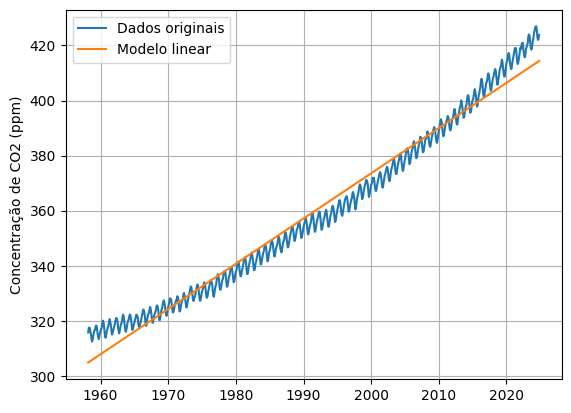

In [ ]:
plt.plot(conc_linear.index, conc_linear['average'], label='Dados originais')
plt.plot(conc_linear.index, conc_linear['CO2_mod'], label='Modelo linear')
plt.legend()
plt.grid()
plt.xlabel('')
plt.ylabel('Concentração de CO2 (ppm)')

f) Faça um gráfico da série de CO2_st sem a tendência linear. Qual as unidades dos coeficientes xo e x1? Como x1 compara com o aumento médio da concentração de CO2 calculado no ítem c)?

Para CO2_mod=x0 +x1⋅t,

x0: representa o valor inicial da concentração de CO2 no tempo zero. A unidade é ppm (partes por milhão).

x1: representa a taxa de crescimento linear da concentração de CO2 ao longo do tempo. A unidade é ppm/mês, pois t está em unidades de tempo.

No item (C) foi calculado o aumento médio por ano, ou seja, taxa de crescimento anual das concentrações de CO2. Neste caso, t estaria em anos.

Text(0, 0.5, 'Concentração de CO2 (ppm)')

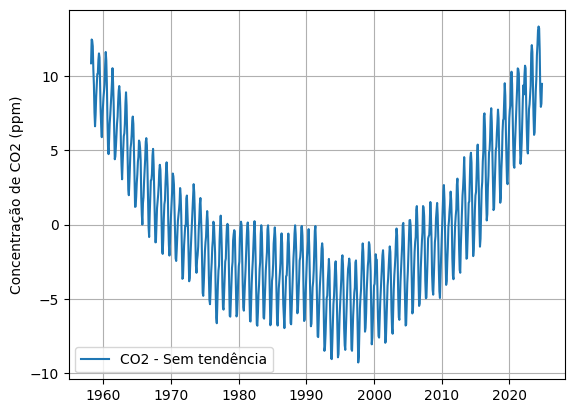

In [ ]:
plt.plot(conc_linear.index, conc_linear['CO2_st'], label='CO2 - Sem tendência')
plt.legend()
plt.xlabel('')
plt.grid()
plt.ylabel('Concentração de CO2 (ppm)')

g) Remova a tendência da série de dados, mas desta vez introduza um termo quadrático. Para tanto, ajuste um modelo linear aos dados de CO2, do tipo:
CO2_mod2 = xo + x1 . t + x2 . t2
Onde, t é o tempo. Então, calcule a nova série sem as tendências linear e quadrática:
CO2_st2 = CO2 - CO2_mod2


In [ ]:
def remove_quadratic_trend(df, column):

    # Criação de t (tempo em meses) baseado no índice
    t = np.arange(len(df))
    t2 = t**2  # Termo quadrático

    # Construção da matriz de regressão com termo constante, t e t^2
    X = pd.DataFrame({'const': 1, 't': t, 't2': t2},index=df.index)

    # Ajuste do modelo quadrático
    model = sm.OLS(df[column], X).fit()
    df['CO2_mod2'] = model.predict(X)
    df['CO2_st2'] = df[column] - df['CO2_mod2']

    print(model.summary())

    return df

In [ ]:
conc_quad = remove_quadratic_trend(conc.copy(), 'average')

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 8.198e+04
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:37:01   Log-Likelihood:                -1779.0
No. Observations:                 801   AIC:                             3564.
Df Residuals:                     798   BIC:                             3578.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        314.6801      0.236   1332.081      0.0

In [ ]:
def plotQuadratic(df):
  plt.figure(figsize=(10, 6))
  plt.plot(df.index, df['average'], label='Dados originais', alpha=0.7)
  plt.plot(df.index, df['CO2_mod2'], label='Tendência quadrática', linestyle='--')
  plt.legend()
  plt.title('Tendência quadrática')
  plt.xlabel('Tempo')
  plt.ylabel('Concentração de CO2 (ppm)')
  plt.grid()
  plt.show()

  return

h) Faça um gráfico com as curvas de CO2 e CO2_mod2 superpostas em cores diferentes, adicione uma legenda.

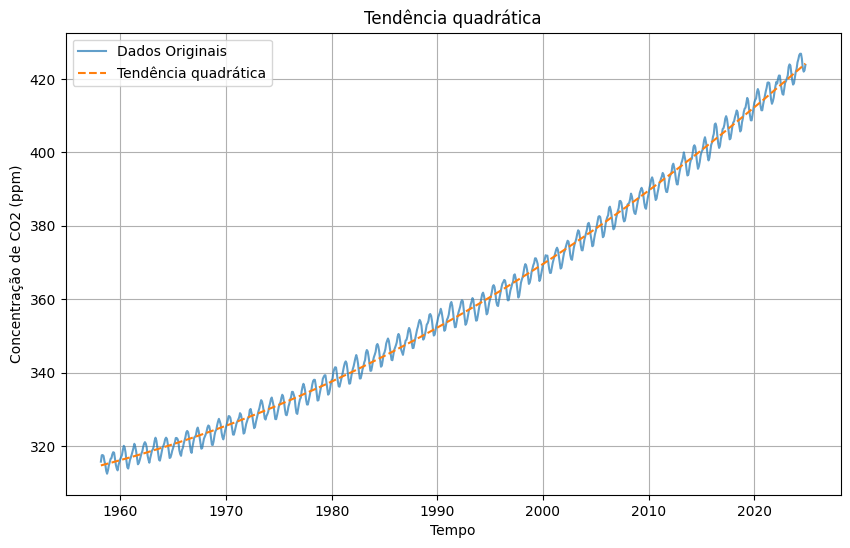

In [ ]:
plotQuadratic(conc_quad)

i) Faça um gráfico da série de CO2_st2 sem as tendências linear e quadrática. Qual a unidade do coeficiente x2? Como x1 compara com o aumento médio anual da concentração de CO2 calculado no ítem c)?

O coeficiente x2 é o termo associado à variável t^2 no modelo quadrático, logo, a unidade é ppm/mês^2, pois a unidade de x2 é ppm e t está em mês.


Já x1 representa a taxa linear de crescimento do CO₂ por unidade de tempo.
O valor de x1 no modelo quadrático deve ser próximo ao aumento médio anual calculado no item c), porque ambos representa o crescimento linear médio da série. Pequenas diferenças podem surgir devido à presença do termo quadrático que captura mudanças na taxa de crescimento ao longo do tempo.

Text(0, 0.5, 'Concentração de CO2 (ppm)')

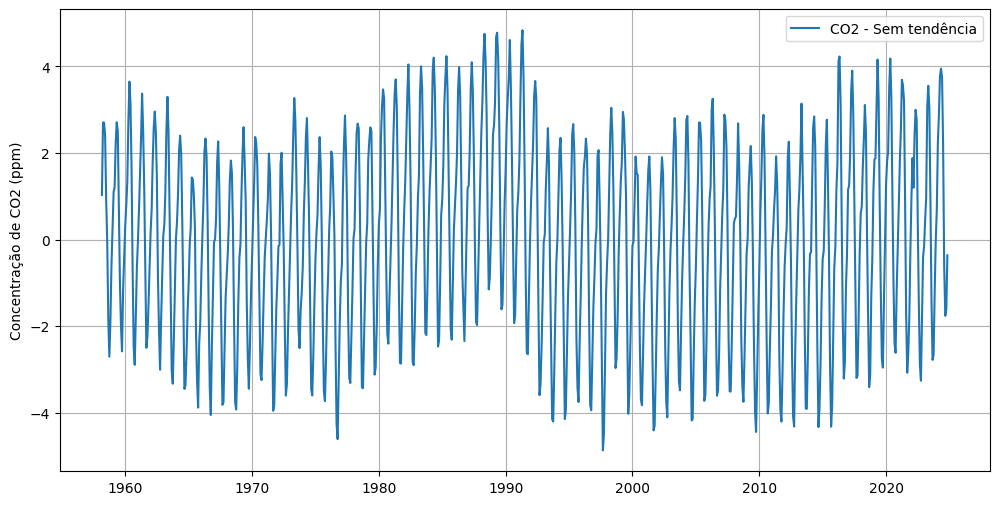

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(conc_quad.index, conc_quad['CO2_st2'], label='CO2 - Sem tendência')
plt.legend()
plt.xlabel('')
plt.grid()
plt.ylabel('Concentração de CO2 (ppm)')

j) Calcule e faça um gráfico do ciclo anual de CO2. Para tanto, ajuste um modelo harmônico a série CO2_st2. O modelo terá a forma:
CO2_mod3 = x0 + x1.sen(2..f.t) + x2.cos(2..f.t) + x3.sen(4..f.t) + x4.cos(4..f.t)
Onde, f = 1/1 ano = 1/ 365,25 dias. Não inclua valores ausentes no cálculo. Sobreponha o gráfico do modelo de regressão acima ao da série de tempo de CO2_st2.


In [40]:
def createHarm(df):
  df = df.dropna(subset=["CO2_st2"])

  #definir frequência para período anual
  f = 1 / 365.25
  #definir período de análise considerando a série harmônica
  t = (df.index - df.index[0]).days

  X = pd.DataFrame({
      "const": 1,
      "sin_1": np.sin(2 * np.pi * f * t),
      "cos_1": np.cos(2 * np.pi * f * t),
      "sin_2": np.sin(4 * np.pi * f * t),
      "cos_2": np.cos(4 * np.pi * f * t)
  }, index=df.index)

  model = sm.OLS(df["CO2_st2"], X).fit()
  df["CO2_mod3"] = model.predict(X)

  plt.figure(figsize=(12, 6))
  plt.plot(df.index, df["CO2_st2"], label="Dados originais (CO2_st2)", alpha=0.7)
  plt.plot(df.index, df["CO2_mod3"], label="Modelo harmônico (CO2_mod3)", color="red", linewidth=1)
  plt.xlabel("")
  plt.ylabel("Concentração de CO2 (ppm)")
  plt.title("Modelo harmônico")
  plt.legend()
  plt.grid(True)
  plt.show()

  print(model.summary())

  return df

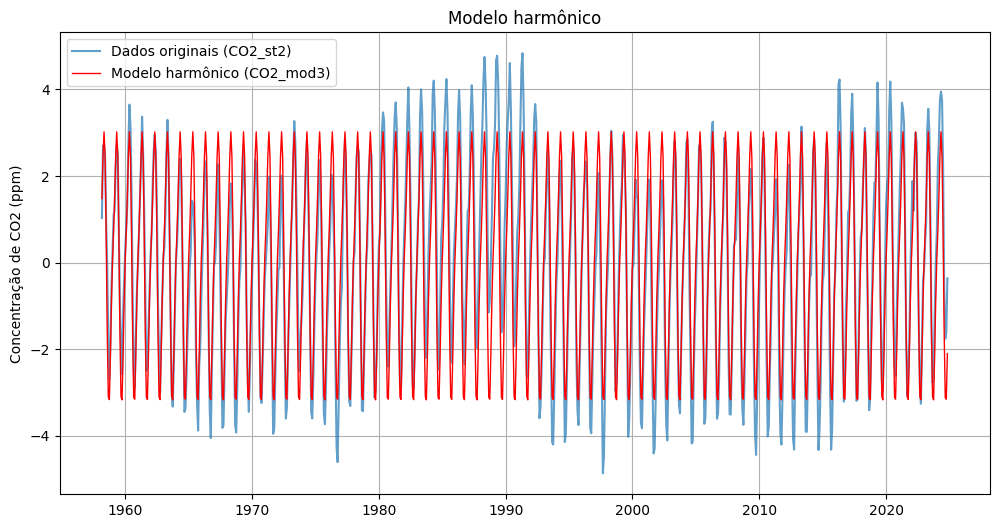

                            OLS Regression Results                            
Dep. Variable:                CO2_st2   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1347.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:32:31   Log-Likelihood:                -957.86
No. Observations:                 801   AIC:                             1926.
Df Residuals:                     796   BIC:                             1949.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0074      0.028     -0.262      0.7

In [41]:
conc_harm = createHarm(conc_quad.copy())

In [ ]:
print(conc_harm)

            year  month  decimal date  average  deseasonalized  ndays  sdev  \
data                                                                          
1958-03-01  1958      3     1958.2027   315.71          314.44     -1 -9.99   
1958-04-01  1958      4     1958.2877   317.45          315.16     -1 -9.99   
1958-05-01  1958      5     1958.3699   317.51          314.69     -1 -9.99   
1958-06-01  1958      6     1958.4548   317.27          315.15     -1 -9.99   
1958-07-01  1958      7     1958.5370   315.87          315.20     -1 -9.99   
...          ...    ...           ...      ...             ...    ...   ...   
2024-07-01  2024      7     2024.5417   425.55          425.11     24  0.69   
2024-08-01  2024      8     2024.6250   422.99          424.83     22  1.08   
2024-09-01  2024      9     2024.7083   422.03          425.44     18  0.41   
2024-10-01  2024     10     2024.7917   422.38          425.63     22  0.35   
2024-11-01  2024     11     2024.8750   423.85      

k) Faça um gráfico de:
CO2_st3 = CO2 - CO2_mod2 - CO2_mod3


Text(0.5, 1.0, 'Gráfico de CO2_st3')

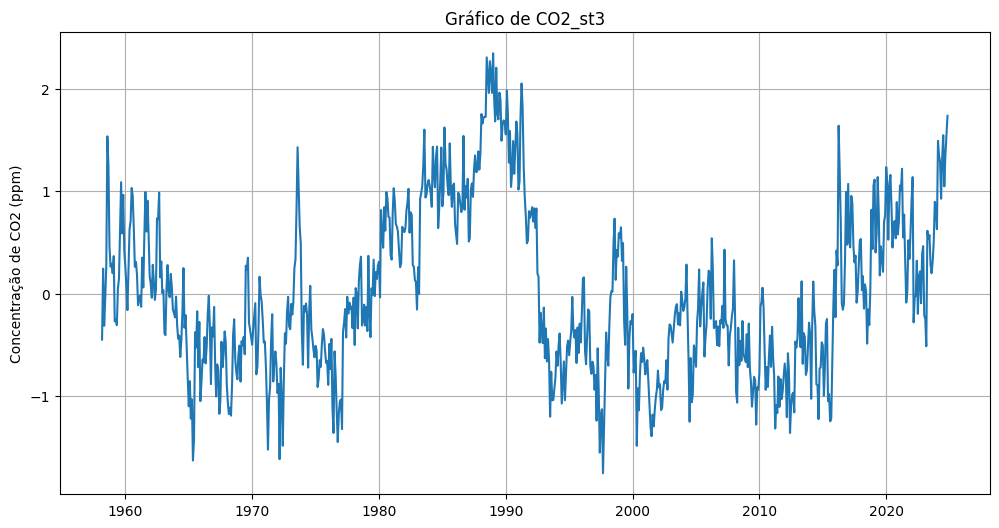

In [43]:
co_st3 = conc_harm['average'] - conc_harm['CO2_mod2'] - conc_harm['CO2_mod3']
plt.figure(figsize=(12, 6))
plt.plot(co_st3)
plt.grid()
plt.xlabel('')
plt.ylabel('Concentração de CO2 (ppm)')
plt.title('Gráfico de CO2_st3')